In [1]:
%load_ext autoreload
%autoreload 2
import sys
import torch
from torch import nn
sys.path.append('..')
# sys.path.append('/system/user/beck/pwbeck/projects/regularization/ml_utilities')
from pathlib import Path
from typing import Union
from erank.data import get_metadataset_class
from omegaconf import OmegaConf
from torch.utils import data
from erank.utils import load_directions_matrix_from_task_sweep
import matplotlib.pyplot as plt
gpu_id = 0

/home/max/anaconda3/envs/erank/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sinus_dataset_class = get_metadataset_class('sinus')
sinus_dataset_class

erank.data.sinusdataset.SinusDataset

In [3]:
sinus_cfg = """
support_size: 10
query_size: 50
num_tasks: 100 #10000
amplitude_range: [0.1, 5.0]
phase_range: [0, 6.283185307]
x_range: [-5, 5]
regenerate_task_support_set: False
"""
sinus_cfg = OmegaConf.create(sinus_cfg)
sinus_cfg

{'support_size': 10, 'query_size': 50, 'num_tasks': 100, 'amplitude_range': [0.1, 5.0], 'phase_range': [0, 6.283185307], 'x_range': [-5, 5], 'regenerate_task_support_set': False}

In [4]:
sinus_dataset = sinus_dataset_class(**sinus_cfg)

Generating Sinus tasks: 100%|██████████| 100/100 [00:00<00:00, 975.87it/s]


In [5]:
tasks = sinus_dataset.sample_tasks(5)

In [6]:
def plot_tasks(tasks):
    for t in tasks:
        plt.plot(t.query_set[0].numpy(), t.query_set[1].numpy())

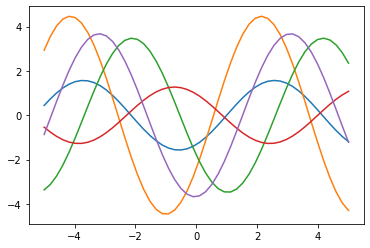

In [7]:
# plot task batch
plot_tasks(tasks)

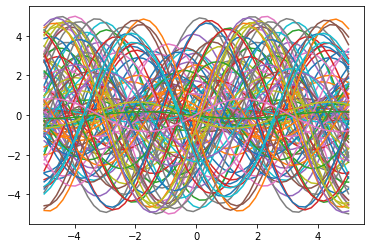

In [8]:
# plot all tasks
plot_tasks(sinus_dataset.tasks)

In [9]:
task = tasks[4]

In [10]:
task.support_set

(tensor([[-4.1222],
         [ 0.7616],
         [-4.9932],
         [-1.7194],
         [-2.2892],
         [ 3.0874],
         [ 3.6789],
         [ 3.2970],
         [-2.4814],
         [-2.0800]]),
 tensor([[ 2.1952],
         [-2.5299],
         [-0.8411],
         [ 0.3621],
         [ 2.2777],
         [ 3.6753],
         [ 3.0596],
         [ 3.5981],
         [ 2.7869],
         [ 1.6293]]))

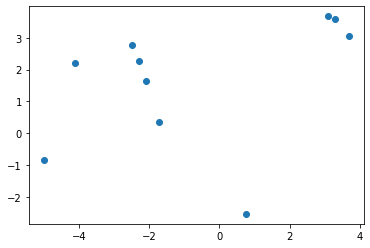

In [11]:
plt.plot(task.support_set[0].numpy(), task.support_set[1].numpy(), 'o')

In [12]:
task.query_set

(tensor([[-5.0000],
         [-4.7959],
         [-4.5918],
         [-4.3878],
         [-4.1837],
         [-3.9796],
         [-3.7755],
         [-3.5714],
         [-3.3673],
         [-3.1633],
         [-2.9592],
         [-2.7551],
         [-2.5510],
         [-2.3469],
         [-2.1429],
         [-1.9388],
         [-1.7347],
         [-1.5306],
         [-1.3265],
         [-1.1224],
         [-0.9184],
         [-0.7143],
         [-0.5102],
         [-0.3061],
         [-0.1020],
         [ 0.1020],
         [ 0.3061],
         [ 0.5102],
         [ 0.7143],
         [ 0.9184],
         [ 1.1224],
         [ 1.3265],
         [ 1.5306],
         [ 1.7347],
         [ 1.9388],
         [ 2.1429],
         [ 2.3469],
         [ 2.5510],
         [ 2.7551],
         [ 2.9592],
         [ 3.1633],
         [ 3.3673],
         [ 3.5714],
         [ 3.7755],
         [ 3.9796],
         [ 4.1837],
         [ 4.3878],
         [ 4.5918],
         [ 4.7959],
         [ 5.0000]])

([<matplotlib.lines.Line2D at 0x7f268a7e97f0>], 4.462344324823483)

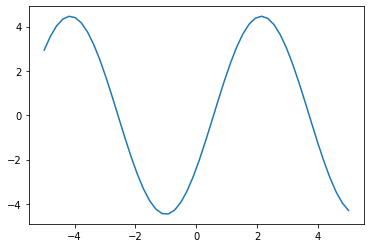

In [13]:
task = tasks[1]
plt.plot(task.query_set[0].numpy(), task.query_set[1].numpy()), task.amplitude

In [14]:
sinus_dataset.amplitudes

array([3.22111227, 1.4219549 , 0.30077027, 0.18098541, 4.08502417,
       4.57250233, 3.0725153 , 3.67453315, 2.76376246, 4.68185488,
       4.09768242, 0.11341865, 4.30128096, 0.26456932, 3.67531169,
       0.96071254, 4.32957672, 2.75315998, 1.56858826, 2.17116738,
       0.23876639, 0.70898805, 3.38605963, 3.27122861, 3.11538705,
       1.98002002, 4.98632869, 4.90609316, 3.45915572, 3.28725045,
       3.47338898, 2.00571498, 0.76197287, 3.63529287, 2.67423618,
       1.62018519, 2.48059326, 4.45849039, 4.67681323, 1.85319646,
       2.90049617, 1.67716002, 3.01207015, 1.755765  , 2.0189331 ,
       4.46234432, 1.21307221, 3.15361701, 0.51167518, 4.17995632,
       3.95678171, 1.27291027, 4.39477273, 0.38698337, 1.7469736 ,
       0.83636939, 2.3066629 , 4.00198892, 1.23014682, 0.35490438,
       2.08230402, 1.07271392, 0.54468992, 2.94362869, 1.56361105,
       3.3927749 , 1.07762568, 4.71635424, 1.88903982, 0.61692687,
       3.18262994, 4.64305731, 2.25784806, 4.77749342, 2.54948

In [15]:
for t in tasks:
    print(t.amplitude)

1.5685882636331856
4.462344324823483
3.4733889797976065
1.2729102706654658
3.6753116875067264


## Use Dataloader for task loading

In [20]:
sinus_cfg = """
support_size: 10
query_size: 50
num_tasks: 1000
amplitude_range: [0.1, 5.0]
phase_range: [0, 6.283185307]
x_range: [-5, 5]
regenerate_task_support_set: False
seed: 0
"""
sinus_cfg = OmegaConf.create(sinus_cfg)
sinus_dataset = sinus_dataset_class(**sinus_cfg)


Generating Sinus tasks: 100%|██████████| 1000/1000 [00:00<00:00, 1585.20it/s]


In [17]:
dataloader = data.DataLoader(sinus_dataset, batch_size=None, num_workers=4, persistent_workers=True)
episode_iter = iter(dataloader)


In [19]:
for i in range(5):
    task = next(episode_iter)
    print(task.name)

Ampl_4.9760-Phase_6.0219
Ampl_0.8364-Phase_4.4149
Ampl_2.0057-Phase_3.4815
Ampl_1.8890-Phase_5.5374
Ampl_4.6431-Phase_6.2513
